In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from env import user, password, host
import env
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire

iris_df = acquire.get_iris_data()


In [30]:
iris_df

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [33]:
def cluster(target):
    X = target[['petal_length', 'sepal_length']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

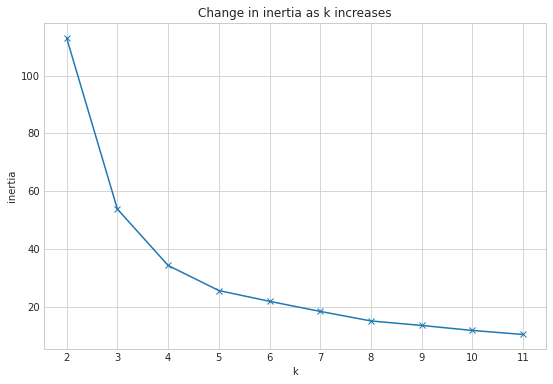

In [34]:
cluster(iris_df)

In [35]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [36]:
iris_df['cluster'] = kmeans.predict(X)


In [37]:
iris_df.groupby('species_name').mean()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,cluster
species_name,,,,,,,
setosa,1.0,25.5,5.006,3.428,1.462,0.246,1.00
versicolor,2.0,75.5,5.936,2.770,4.260,1.326,0.18
virginica,3.0,125.5,6.588,2.974,5.552,2.026,1.48


[Text(0.5, 1.0, 'K-Means Clusters')]

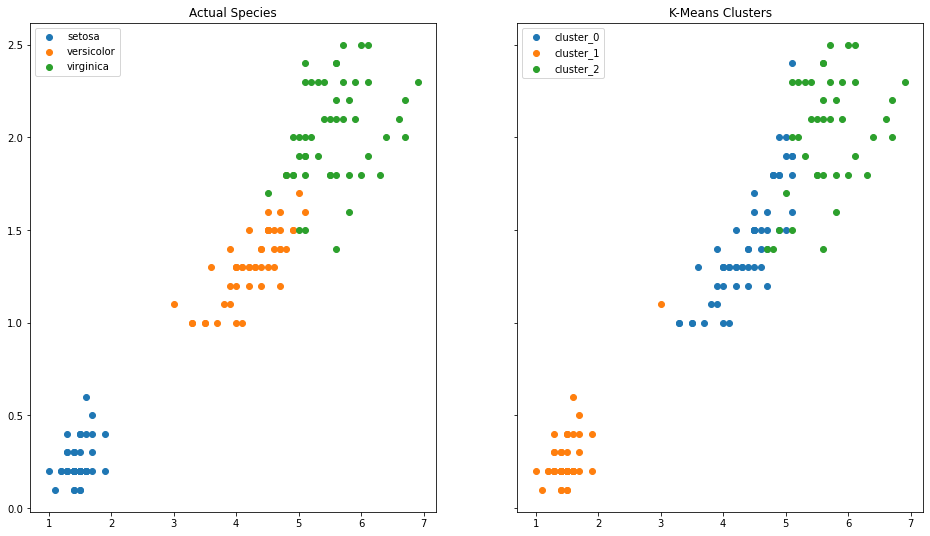

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in iris_df.groupby('species_name'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in iris_df.cluster.sort_values().unique():
    axs[1].scatter(iris_df[iris_df.cluster == cluster_n].petal_length, iris_df[iris_df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

In [45]:
kmeans.cluster_centers_


array([[4.39310345, 5.87413793],
       [1.49215686, 5.00784314],
       [5.67804878, 6.83902439]])

In [46]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,petal_length,sepal_length
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


In [48]:
iris_df.groupby('cluster')['petal_length', 'sepal_length'].mean()


,petal_length,sepal_length
cluster,,
0,4.393103,5.874138
1,1.492157,5.007843
2,5.678049,6.839024


Text(0.5, 1.0, 'Visualizing Cluster Centers')

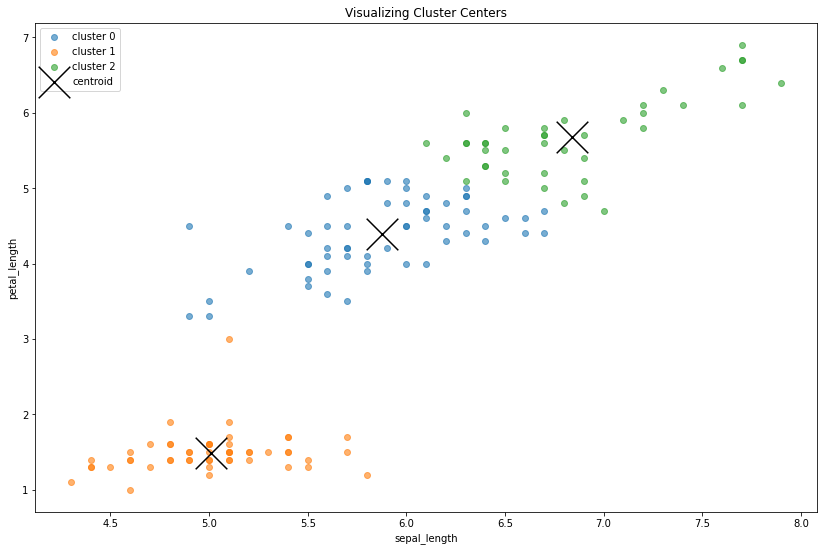

In [49]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris_df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')


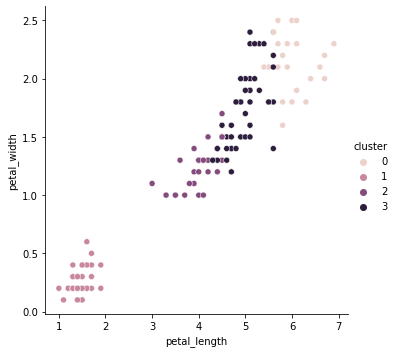

In [50]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')


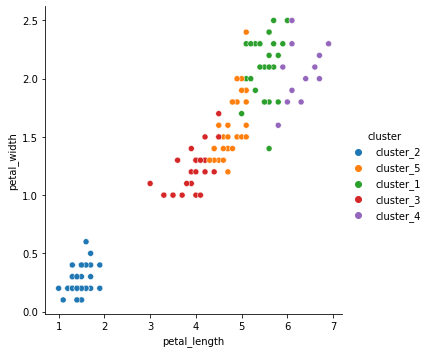

In [51]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')


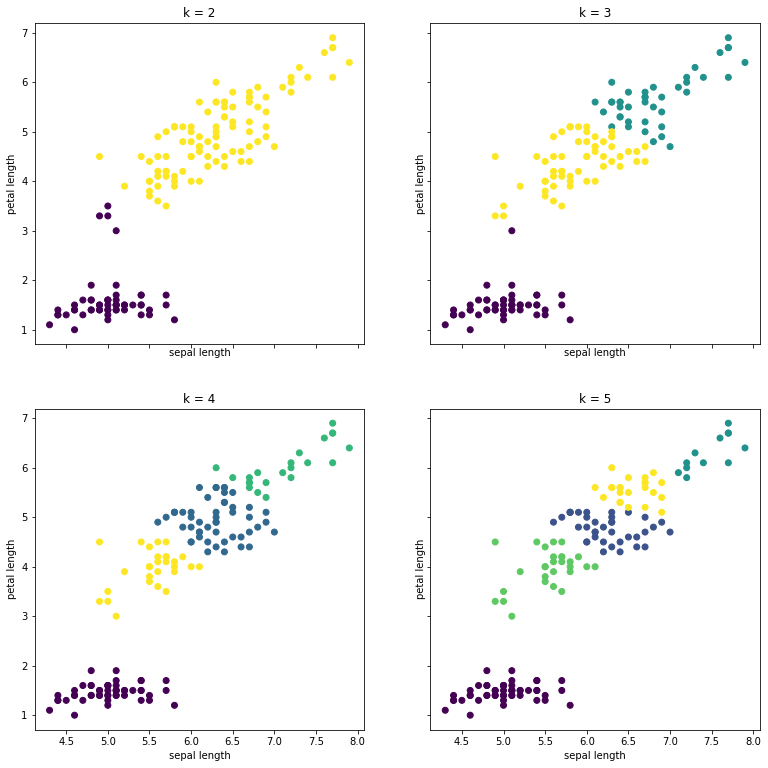

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')


In [ ]:
def cluster(target):
    X = target[['petal_length', 'sepal_length']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

# MALL

In [4]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_MALL_DATA():
    filename = "MALL.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM customers', get_connection('mall_customers'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename, index=False)

        # Return the dataframe to the calling code
        return df  

In [5]:
mall_df=get_MALL_DATA()

In [6]:
mall_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
train_validate, mall_test = train_test_split(mall_df, test_size=.2, random_state=123)
mall_train, mall_validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [8]:
def scale_data(mall_train,mall_validate,mall_test,cols):
    #make the scaler
    scaler = MinMaxScaler()
    #fit the scaler at train data only
    scaler.fit(mall_train[cols])
    #tranforrm train, validate and test
    mall_train_scaled = scaler.transform(mall_train[cols])
    mall_validate_scaled = scaler.transform(mall_validate[cols])
    mall_test_scaled = scaler.transform(mall_test[cols])
    
    # Generate a list of the new column names with _scaled added on
    scaled_columns = [col+"_scaled" for col in cols]
    
    #concatenate with orginal train, validate and test
    scaled_train = pd.concat([mall_train.reset_index(drop = True),pd.DataFrame(mall_train_scaled,columns = scaled_columns)],axis = 1)
    scaled_validate = pd.concat([mall_validate.reset_index(drop = True),pd.DataFrame(mall_validate_scaled, columns = scaled_columns)], axis = 1)
    scaled_test= pd.concat([mall_test.reset_index(drop = True),pd.DataFrame(mall_test_scaled,columns = scaled_columns)],axis = 1)
    
    return scaled_train,scaled_validate,scaled_test

In [10]:
train_scaled, val_scaled, test_scaled = scale_data(mall_train,mall_validate,mall_test,cols=['spending_score', 'age','annual_income'])
train_scaled.head()

,customer_id,gender,age,annual_income,spending_score,spending_score_scaled,age_scaled,annual_income_scaled
0,124,Male,39,69,91,0.957447,0.403846,0.442623
1,77,Female,45,54,53,0.553191,0.519231,0.319672
2,172,Male,28,87,75,0.787234,0.192308,0.590164
3,11,Male,67,19,14,0.138298,0.942308,0.032787
4,36,Female,21,33,81,0.851064,0.057692,0.147541


In [11]:
def cluster1(target):
    X = target[['annual_income', 'spending_score']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

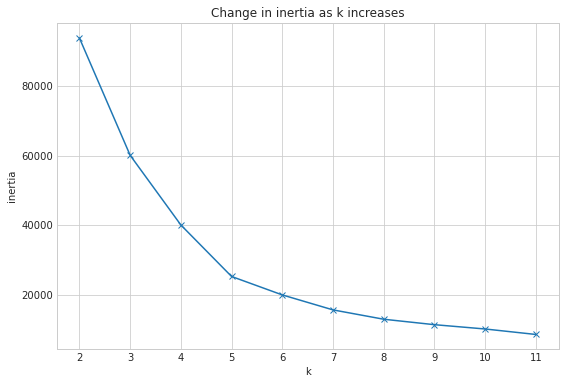

In [12]:
cluster1(train_scaled)

In [15]:
X = train_scaled[['spending_score', 'annual_income']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 0, 3, 2, 2, 3,
       3, 3, 3, 2, 2, 0, 2, 1, 1, 3, 2, 1, 2, 3, 0, 3, 3, 3, 2, 0, 0, 0,
       0, 1, 2, 3, 2, 1, 3, 0, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 3, 3, 3, 3,
       0, 3, 1, 1, 2, 0, 0, 3, 3, 3, 3, 1, 3, 2, 1, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 1, 2, 2, 3, 2, 3, 3, 2, 0, 0, 0, 3, 3, 2, 3, 3, 3, 2, 3, 0,
       3, 3], dtype=int32)

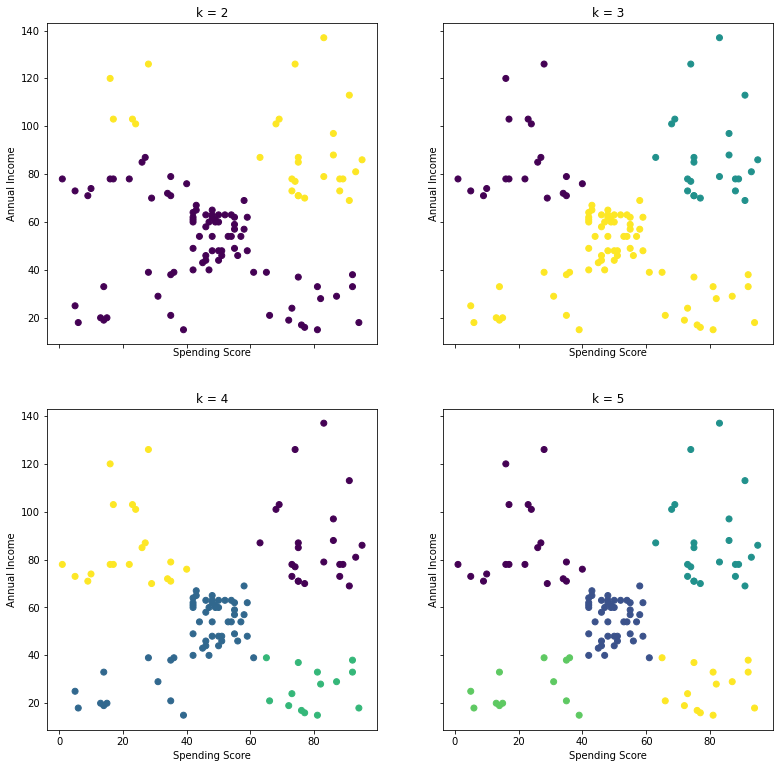

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Spending Score', ylabel='Annual Income')


In [19]:
def cluster2(target):
    X = target[['annual_income_scaled', 'spending_score_scaled']]
    with plt.style.context('seaborn-whitegrid'):
    #graph size
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    kmeans.predict(X)
    target['cluster']= kmeans.predict(X)

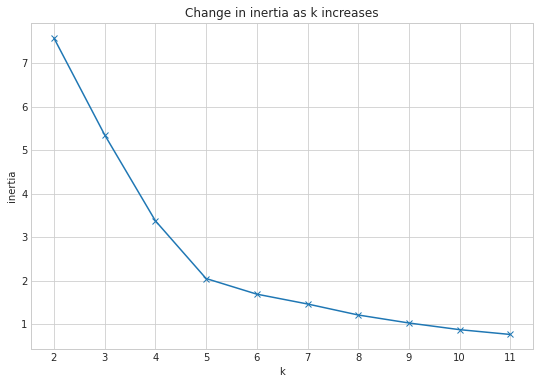

In [20]:
cluster2(train_scaled)

In [21]:
X = train_scaled[['spending_score_scaled', 'annual_income_scaled']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 0, 1, 3, 3, 2, 1, 3, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0,
       0, 3, 1, 2, 1, 3, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2,
       3, 2, 3, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0,
       2, 2], dtype=int32)

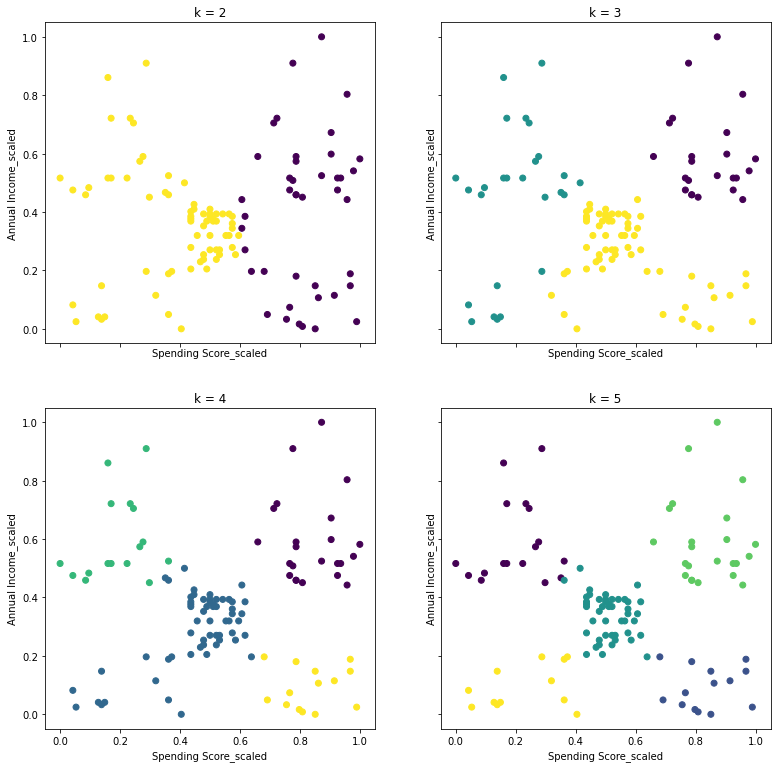

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score_scaled, X.annual_income_scaled, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Spending Score_scaled', ylabel='Annual Income_scaled')